<img src = "https://escp.eu/sites/default/files/logo/ESCP-logo-white-misalign.svg" width = 400 style="background-color: #240085;">
<h1 align=center><font size = 6>ESCP Business School</font></h1>
<h3 align=center><font size = 5>SCOR Datathon</font><br/>
<font size = 3>The Data Science Challenge Bridging Indian Agricultureal Protection Gap</font></h3>
<h6 align=center>Chapter 2B - Preprocessing (cont'd)</h6>

Last Updated: December 20, 2021\
Author: Group 21 - Anniek Brink, Jeanne Dubois, and Resha Dirga

<h3>Chapter Objectives</h3>

<p>In this chapter the merged datasets will be processed based on the findings and next steps in Data Exploratory chapter. At the end of this chapter, the dataset should be ready to be used for clustering. The treatment will focus on data imputation to fill the missing values on Premium for insurance columns and Production yield columns.</p>

<p>In addition to the three items above, the best granularity level for analysis shall be determined during Data Imputation to get the best result possible.</p>

<u>Note:</u> This chapter is a continuation of <b><i>Chapter 2A - Preprocessing</i></b>

<h3>Chapter 1: Import modules</h3>
<p>This chapter lists all modules that being used on this document. The module import process will be performed on this chapter</p>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import math
import statistics

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

<h3>Chapter 2: Read datasets</h3>
<p>This chapter reads the merged datasets and provides a quick overview of each datasets, i.e.: the first five line of each dataset, information of the data types and the summary of all numerical values.</p>

<h5>Chapter 2.1 - Read datasets from the preprocessing checkpoint</h5>

In [2]:
# List of file directories
checkpoint_preprocessed_filenames = [
    "datasets_preprocessed/df_kharif_preprocessed_checkpoint_1.csv",
    "datasets_preprocessed/df_rabi_preprocessed_checkpoint_1.csv"
]

In [3]:
# Store datasets in a dataframe
df = {}
for filename in checkpoint_preprocessed_filenames:
    df[filename] = pd.read_csv(filename, delimiter=";",index_col = 0)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
# Create a function for indexing the specific dataset
def df_shorten(season):
    if season == "kharif":
        return df[list(df.keys())[0]]
    elif season == "rabi":
        return df[list(df.keys())[1]]
    else:
        print("Data is out of range. Available season data: kharif, rabi (case sensitive)")
        return

<h5>Chapter 2.2 - Dataset overview</h5>

In [5]:
# Setup viewing parameter for dataset overview
pd.set_option('display.max_columns', None)

In [6]:
# Print datasets info
for index in checkpoint_preprocessed_filenames:
    print('')
    print(index)
    print('----------')
    df[index].info()
    print('<<=====================>>')


datasets_preprocessed/df_kharif_preprocessed_checkpoint_1.csv
----------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 511242 entries, 1850 to 511241
Data columns (total 35 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   State               511242 non-null  object 
 1   Cluster             511242 non-null  int64  
 2   District            511242 non-null  object 
 3   Sub-District        429814 non-null  object 
 4   Block               365178 non-null  object 
 5   GP                  374588 non-null  object 
 6   Season              511242 non-null  object 
 7   Crop                511242 non-null  object 
 8   Area Sown (Ha)      235991 non-null  float64
 9   Area Insured (Ha)   463017 non-null  float64
 10  SI Per Ha (Inr/Ha)  483684 non-null  float64
 11  Sum Insured (Inr)   490574 non-null  float64
 12  Indemnity Level     511242 non-null  float64
 13  2000 Yield          13682 non-null   float64
 14  2001 Yi

In [7]:
# Print datasets first five lines
for index in checkpoint_preprocessed_filenames:
    print('')
    print(index)
    print('----------')
    print(df[index].head())
    print('<<=====================>>')


datasets_preprocessed/df_kharif_preprocessed_checkpoint_1.csv
----------
               State  Cluster  District Sub-District Block                 GP  \
1850  andhra pradesh        1  chittoor  b.kothakota   NaN    badikayalapalle   
1851  andhra pradesh        1  chittoor  b.kothakota   NaN  bayyappagaripalle   
1852  andhra pradesh        1  chittoor  b.kothakota   NaN           beerangi   
1853  andhra pradesh        1  chittoor  b.kothakota   NaN              gattu   
1854  andhra pradesh        1  chittoor  b.kothakota   NaN         gollapalle   

      Season   Crop  Area Sown (Ha)  Area Insured (Ha)  SI Per Ha (Inr/Ha)  \
1850  kharif  paddy        9.336967           7.330287             70000.0   
1851  kharif  paddy        9.336967           7.330287             70000.0   
1852  kharif  paddy        9.336967           7.330287             70000.0   
1853  kharif  paddy        9.336967           7.330287             70000.0   
1854  kharif  paddy        9.336967           7.3

In [8]:
# Print datasets summary for numerical columns
for index in checkpoint_preprocessed_filenames:
    print('')
    print(index)
    print('----------')
    print(df[index].describe())
    print('<<=====================>>')


datasets_preprocessed/df_kharif_preprocessed_checkpoint_1.csv
----------
             Cluster  Area Sown (Ha)  Area Insured (Ha)  SI Per Ha (Inr/Ha)  \
count  511242.000000   235991.000000      463017.000000       483684.000000   
mean        4.812815      414.274412         173.325412        38769.535964   
std         2.889222     1188.494481         830.693864        21618.886084   
min         1.000000        0.000000           0.000000         1400.000000   
25%         2.000000       78.093023           1.667800        20524.000000   
50%         4.000000      170.689798          35.017224        36000.000000   
75%         7.000000      376.251451         150.433460        51686.000000   
max        12.000000    85824.000000       85300.000000       250000.000000   

       Sum Insured (Inr)  Indemnity Level    2000 Yield    2001 Yield  \
count       4.905740e+05    511242.000000  13682.000000  13664.000000   
mean        7.813047e+06         0.810371   1547.075772   2334.42837

<h3>Chapter 3: Data Imputation (cont'd)</h3>
<h5>Chapter 3.2 - Data Imputation for Production yield (cont'd)</h5>

In [9]:
# Create function to check null-values
def check_null(data):
    try:
        sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')
    except:
        pass
    
    df_check_null = {
    'Null': data.isna().sum(),
    'Non-null': data.count(),
    }
    
    return pd.DataFrame(df_check_null).transpose()

In [10]:
# Create function to impute column to target column
def impute_data(target_col, imputed_col):
    try:
        if pd.isnull(target_col):
            return imputed_col
        else:
            return target_col
    except:
        pass

<b><i>3.2.1 - Data Imputation using mean for district group with t-test for equal mean across data point with confidence level of 95%</i></b>

<p>By comparing the checkpoint dataset info with the dataset info at the beginning of the preprocessing chapter, it is apparent that some of the null-values has been imputed after running the preprocessing code on Terminal. The next step for the preprocessing to impute the data is to impute the data using regression from the previous years.</p>

<b><i>3.2.2 - Data Imputation using mean for district group with regression from the previous years</i></b>

<p>On this step, data imputation will be performed using regression of the following features:
    <ul>
        <li><u>Yield of 7 previous years</u> since this is the number of years used to perform loss calculation. The same number of years is used so that the regression utilise the same assumption to determine the number of years used on any analysis</li>
        <li><u>External data</u> that will be used to support the regression to get better regression model.</li>
    </ul>
</p>
<p><b>Regression Model:</b>
Since there are a lot of features that being considered and the significance of those features are not known in detail, the regression to perform will use ElasticNet technique. Model Parameter will be determined using cross-validation method (CV) with folds of 10 and train test split of 80-20.
</p>
<p><b>Granularity:</b>
Based on the availability of external data and to balance between granularity and information detail, regression will be perfromed on: (1) State administration level; (2) by Crop; and (3) by Season.
</p>

In [11]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [12]:
# Define yield columns to consider during regression
col_yield = ['2003 Yield', '2004 Yield', '2005 Yield', '2006 Yield', '2007 Yield', '2008 Yield', '2009 Yield', '2010 Yield', '2011 Yield', '2012 Yield', '2013 Yield', '2014 Yield', '2015 Yield', '2016 Yield', '2017 Yield', '2018 Yield']

In [13]:
# Prepare data from df_learn to build regression model
def execute_regression(df_regress, col_features, col_target, score_threshold):
    # Encode Crops values
    le = preprocessing.LabelEncoder()
    df_regress['Crop_encoded'] = le.fit_transform(df_regress['Crop'])

    # Create two dataframes: for learning (non-null on target column) and for regression to apply (null on target column)
    df_apply = df_regress[df_regress[col_target].isnull()]
    df_apply = df_apply.dropna(subset=col_features, axis='index')
    df_learn = df_regress[~df_regress[col_target].isnull()]
    df_learn = df_learn.dropna(subset=col_features, axis='index')

    try:
        # Assign train and test data
        x = df_learn[col_features].to_numpy()
        y = df_learn[col_target].to_numpy()

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

        # Determine alpha values to test and build the model
        alphas = [10 ** i for i in range(-5, 10)]

        elastic_cv = ElasticNetCV(alphas = alphas)
        model = elastic_cv.fit(x_train, y_train)

        # Evaluate model    
        y_pred = model.predict(x_test)
        score = model.score(x_test, y_test)
        mse = mean_squared_error(y_test, y_pred)

        model_result = {
            'Alpha': [model.alpha_],
            'Intercept': [model.intercept_],
            'Score (R2)': [score],
            'MSE': [mse]
        }

        # Regress data on df_apply using trained model if score > score_threshold
        if (score > score_threshold) & (len(df_apply) > 0):
            df_apply['col_regres'] = model.predict(df_apply[col_features])
            return df_apply[['ID', 'col_regres']], model_result
        else:
            return None
    except:
        return None

In [14]:
# Perform regression
df_to_impute = pd.DataFrame()
df_result = pd.DataFrame()

for season in ["kharif", "rabi"]:
    # Setup a temporary dataset to build the regression model
    df_data = df_shorten(season)
    year_in_range = 5

    # Define columns to use during regression
    col_index_range = range(len(col_yield) - year_in_range - 1, 0, -1)

    # Get list of states in the dataset        
    state_list = df_data['State'].unique()

    for n in col_index_range:
        # Identify feature and target columns   
        col_features = col_yield[n:(n+year_in_range)]
        col_target = [col_yield[(n+year_in_range)]]

        for state in state_list:
            # Setup dataset to use for regression
            df_regress = df_data[df_data['State'] == state][['ID', 'State', 'Crop'] + col_features + col_target]

            if (df_regress[col_target[0]].isna().sum() > 0) & (df_regress[col_target[0]].count() > 0):
                # Build model and get model evaluation if the score of the model > 85%
                model_result = execute_regression(df_regress, col_features, col_target[0], 0.85)

                if (model_result is not None):
                    # Store model result on variables
                    df_to_impute = model_result[0]
                    df_result = model_result[1]

                    # Impute regression data into temporary dataset
                    df_data = pd.merge(df_data, df_to_impute, on="ID", how="left")
                    df_data[col_target] = df_data.apply(lambda x: impute_data(x[col_target[0]], x['col_regres']), axis=1)
                    df_data = df_data.drop(['col_regres'], axis=1)

        # Impute to main dataset
        df_shorten(season)[col_target] = df_data[col_target]


/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but E

,State,Cluster,District,Sub-District,Block,GP,Season,Crop,Area Sown (Ha),Area Insured (Ha),SI Per Ha (Inr/Ha),Sum Insured (Inr),Indemnity Level,2000 Yield,2001 Yield,2002 Yield,2003 Yield,2004 Yield,2005 Yield,2006 Yield,2007 Yield,2008 Yield,2009 Yield,2010 Yield,2011 Yield,2012 Yield,2013 Yield,2014 Yield,2015 Yield,2016 Yield,2017 Yield,2018 Yield,ID,GP_Group,District_Group
Null,0,0,0,81428,146064,136654,0,0,275251,48225,27558,20668,0,497560,497578,496559,315575,320661,209340,84687,64488,56266,45810,2485,1442,2331,2493,14740,4590,75300,349270,511242,0,0,0
Non-null,511242,511242,511242,429814,365178,374588,511242,511242,235991,463017,483684,490574,511242,13682,13664,14683,195667,190581,301902,426555,446754,454976,465432,508757,509800,508911,508749,496502,506652,435942,161972,0,511242,511242,511242


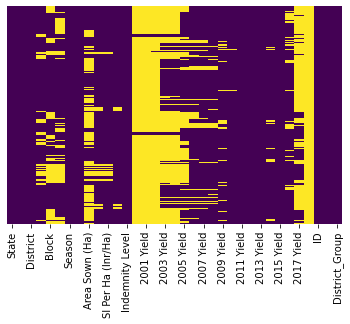

In [15]:
check_null(df_shorten("kharif"))

In [16]:
# Perform regression
df_to_impute = pd.DataFrame()
df_result = pd.DataFrame()

for season in ["kharif", "rabi"]:
    # Setup a temporary dataset to build the regression model
    df_data = df_shorten(season)
    year_in_range = 5

    # Define columns to use during regression
    col_index_range = range(0, len(col_yield) - year_in_range - 1)

    # Get list of states in the dataset        
    state_list = df_data['State'].unique()

    for n in col_index_range:
        # Identify feature and target columns   
        col_features = col_yield[n:(n+year_in_range)]
        col_target = [col_yield[(n+year_in_range)]]

        for state in state_list:
            # Setup dataset to use for regression
            df_regress = df_data[df_data['State'] == state][['ID', 'State', 'Crop'] + col_features + col_target]

            if (df_regress[col_target[0]].isna().sum() > 0) & (df_regress[col_target[0]].count() > 0):
                # Build model and get model evaluation if the score of the model > 95%
                model_result = execute_regression(df_regress, col_features, col_target[0], 0.95)

                if (model_result is not None):
                    # Store model result on variables
                    df_to_impute = model_result[0]
                    df_result = model_result[1]

                    # Impute regression data into temporary dataset
                    df_data = pd.merge(df_data, df_to_impute, on="ID", how="left")
                    df_data[col_target] = df_data.apply(lambda x: impute_data(x[col_target[0]], x['col_regres']), axis=1)
                    df_data = df_data.drop(['col_regres'], axis=1)

        # Impute to main dataset
        df_shorten(season)[col_target] = df_data[col_target]


/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but ElasticNetCV was fitted without feature names
  warnings.warn(
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:438: UserWarning: X has feature names, but E

,State,Cluster,District,Sub-District,Block,GP,Season,Crop,Area Sown (Ha),Area Insured (Ha),SI Per Ha (Inr/Ha),Sum Insured (Inr),Indemnity Level,2000 Yield,2001 Yield,2002 Yield,2003 Yield,2004 Yield,2005 Yield,2006 Yield,2007 Yield,2008 Yield,2009 Yield,2010 Yield,2011 Yield,2012 Yield,2013 Yield,2014 Yield,2015 Yield,2016 Yield,2017 Yield,2018 Yield,ID,GP_Group,District_Group
Null,0,0,0,81428,146064,136654,0,0,275251,48225,27558,20668,0,497560,497578,496559,315575,320661,209340,84687,64488,56266,45810,2410,1442,2244,2427,14302,3481,71477,349270,511242,0,0,0
Non-null,511242,511242,511242,429814,365178,374588,511242,511242,235991,463017,483684,490574,511242,13682,13664,14683,195667,190581,301902,426555,446754,454976,465432,508832,509800,508998,508815,496940,507761,439765,161972,0,511242,511242,511242


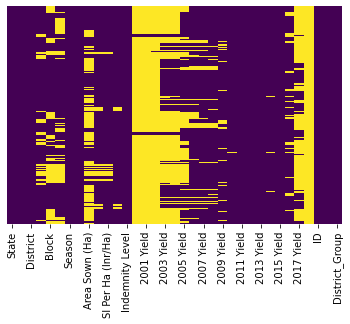

In [17]:
check_null(df_shorten("kharif"))

In [18]:
# List of file directories
preprocessed_checkpoint_2_filenames = [
    "datasets_preprocessed/df_kharif_preprocessed_checkpoint_2.csv",
    "datasets_preprocessed/df_rabi_preprocessed_checkpoint_2.csv"
]

In [20]:
# Export csv as checkpoint for further preprocessing
for filename_index in range(len(preprocessed_checkpoint_2_filenames)):
    df[list(df.keys())[filename_index]].to_csv(preprocessed_checkpoint_2_filenames[filename_index], sep=';')